In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

In [2]:
data = pd.read_csv('sample_data.csv')
data.head()

,Feature1,Feature2,Feature3,Feature4,Target
0,4.5878,1018.7,23.979,549.83,134.67
1,4.2932,1018.3,23.951,550.05,134.67
2,3.9045,1018.4,23.990,550.19,135.10
3,3.7436,1018.3,23.911,550.17,135.03
4,3.7516,1017.8,23.917,550.00,134.67


In [3]:
x = data.iloc[:,0:-1]
y = data['Target']

In [4]:
# Train-test split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

In [5]:
# Model training
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [6]:
# Calculating Residuals
y_pred = lin_model.predict(X_test)
residual = y_test - y_pred

# Assumption: 1

## Checking Linear relationship between independent and dependent features

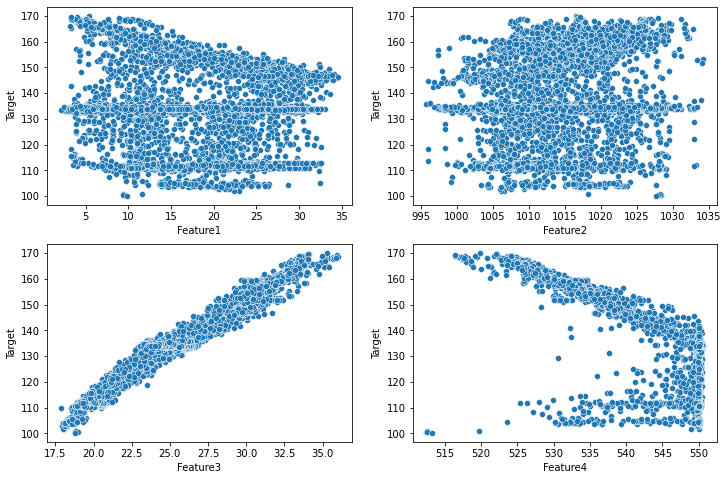

In [7]:
plt.figure(figsize = (12,8))
for i in enumerate(data.iloc[:,0:-1].columns,start = 1):
    plt.subplot(2,2,i[0])
    sns.scatterplot(x = i[1],y = 'Target',data = data)

### Out of the four independent variables, only `Feature3` is exhibiting linear relationship with the target

# Assumption: 2

## Checking Multicollinearity

In [8]:
vif = pd.DataFrame()
vif['variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [9]:
vif

,variable,VIF
0,Feature1,8.590770
1,Feature2,10121.755731
2,Feature3,89.047118
3,Feature4,8963.367774


<AxesSubplot:>

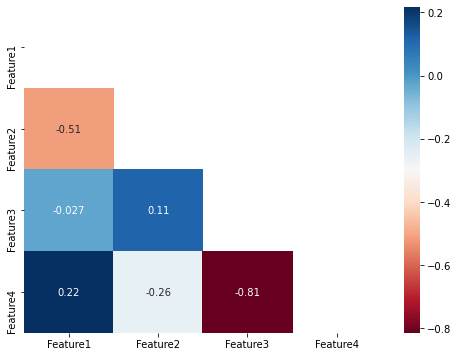

In [10]:
# Aliter for checking multicollinearity
plt.figure(figsize = (8,6))

mask = np.triu(np.ones_like(X_train.corr()))

sns.heatmap(X_train.corr(), cmap="RdBu", annot=True, mask=mask)
 

### As seen above in the heatmap, there is a high correlation between 
### `Feature3` &`Feature4` = -0.81
### `Feature1` &`Feature2` = -0.51
### `Feature2` &`Feature4` = -0.26
### `Feature1` &`Feature4` = 0.22


### The above values suggests that there is a significant amount of collinearity between the independent features violating the assumptions of linear regression

# Assumption: 3

## Checking Homoscedasticity

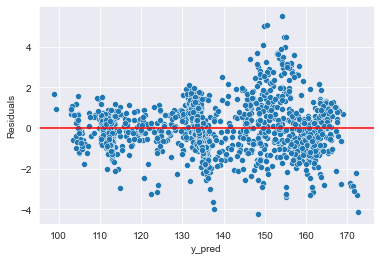

In [11]:
# plot between y_pred and residuals

sns.set_style('darkgrid')
sns.scatterplot(x= y_pred,y = residual)
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.axhline(y = 0,color = 'red')

### Though there are presence of outliers, the spread of residuals seems to have a constant variance along the x-axis

# Assumption: 4

## Normality of residuals

Text(0.5, 0, 'Residual')

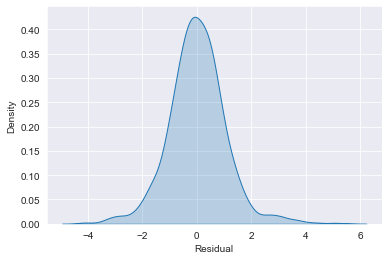

In [12]:
# By the assumptions of linear regression, residues must follow a near normal distribution

sns.kdeplot(x = residual,shade = True)
plt.xlabel('Residual')

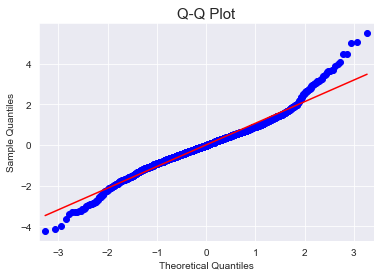

In [13]:
# plot the Q-Q plot

qqplot(residual, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 10)
plt.ylabel('Sample Quantiles', fontsize = 10)

plt.show()

### The points are almost concurrent with the regression line &
### The residuals distribution is almost near normal distribution ashering to the assumption 

# Assumption: 5

## Checking for autocorrelation of residuals

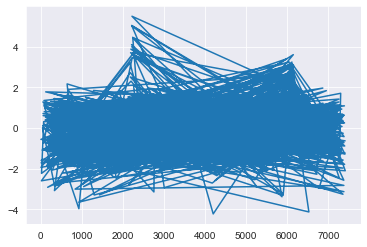

In [14]:
# According to assumptions, there should not be any correlation along the residuals. This can be verfied with a simple
# lineplot

plt.plot(residual)

In [15]:
# A durbin-watson score between 1.5 to 2.5 is considered relatively normal. A durbin-watson score of 2 is said to have 
# zero autocorrelation
dbw = durbin_watson(residual)
  
print(dbw)

2.063605102290437


In [16]:
# Since durbin_watson score is calculated very close to 2, we can surely guarantee that residuals have no autocorrelation
# or very minimal auto-correlation

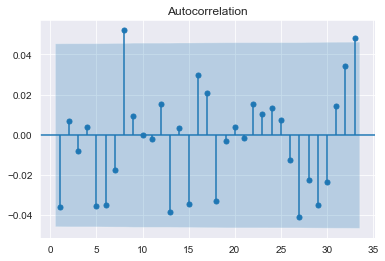

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residual,zero=False)
plt.show()